# Assignment 2 :
- 6주차 NN 기초 강의 과제였던 6_NeuralNetwork_HW.ipynb를 프레임워크로 구현
- PyTorch로 짠 예제 코드를 참고해주세요
- Batch Normalization, Dropout 등 NN 심화에서 다뤘던 내용을 활용

### Softmax - Cross Entropy Error미분  
<img src="img/fig a-5.png">

### 데이터 Load  
cifar-10 데이터를 불러옵니다.  
프레임워크 내 자체적으로 데이터를 로드할 수 있지만, 
이렇게도 데이터 로드가 가능합니다!  
32  32  3 차원의 데이터를 3072 차원으로 바뀌는 것 까지 드릴게요.

In [2]:
from load_cifar_10 import *
import numpy as np
from Model import TwoLayerNet

In [3]:
cifar_10_dir = 'cifar-10-batches-py'

train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
load_cifar_10_data(cifar_10_dir)

def Processing_data(train, test):
    #change dtype
    train = np.array(train, dtype=np.float64)
    test = np.array(test, dtype=np.float64)
    
    #Reshaping
    train = np.reshape(train, (train.shape[0], -1))
    test = np.reshape(test, (test.shape[0], -1))
    
    #Normalizing
    mean_image = np.mean(train, axis = 0)
    #print(train.dtype)
    train -= mean_image
    test -= mean_image
    
    return train, test

In [4]:
train_data, test_data = Processing_data(train_data, test_data)

In [5]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


너무 많으니까 5000개, 1000개만 사용합시다!

In [6]:
train_data = train_data[:5000]
train_labels = train_labels[:5000]
test_data = test_data[:1000]
test_labels = test_labels[:1000]

### 데이터 확인  
실제 데이터가 어떻게 생겼는지는 한번 확인해보세요!

In [7]:
train_data

array([[ -71.71074,  -74.05614,  -69.5538 , ...,   -3.63908,  -33.8503 ,
         -42.38186],
       [  23.28926,   40.94386,   54.4462 , ...,   16.36092,    7.1497 ,
          29.61814],
       [ 124.28926,  118.94386,  122.4462 , ...,  -46.63908,  -39.8503 ,
         -30.38186],
       ...,
       [  36.28926,   26.94386,   12.4462 , ...,  -84.63908,  -47.8503 ,
         -30.38186],
       [  23.28926,   15.94386,   -7.5538 , ...,   67.36092,  121.1497 ,
          -0.38186],
       [ -85.71074, -104.05614, -111.5538 , ...,   29.36092,   16.1497 ,
         -14.38186]])

### 하이퍼파라미터 설정  
하이퍼파라미터를 설정하겠습니다.  
hidden_size, epoch_size, batch_size, learning_rate 등은 전부 하이퍼 파라미터이니 바꿔서 해보세요.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
output_size = 10
epoch_size = 100
batch_size = 100
learning_rate = 0.0001
N = train_data.shape[0]
M = test_data.shape[0] # 새롭게 추가

In [9]:
nn = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [10]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = train_data[batch_mask]
        t_batch = train_labels[batch_mask]
        
        nn.backward(x_batch, t_batch) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(test_data, test_labels))
    history["val_loss"].append(nn.forward(test_data, test_labels))
    
    if i % 10 == 0:
        print(i, "test accuracy :", nn.accuracy(test_data, test_labels))
        print(i, "test loss     :", nn.forward(test_data, test_labels))

0 test accuracy : 0.24
0 test loss     : 2.300592167429571
10 test accuracy : 0.291
10 test loss     : 1.9699646128066108
20 test accuracy : 0.343
20 test loss     : 1.8454815474834878
30 test accuracy : 0.366
30 test loss     : 1.7899343935658334
40 test accuracy : 0.368
40 test loss     : 1.7790446620972271
50 test accuracy : 0.373
50 test loss     : 1.7709561175021038
60 test accuracy : 0.374
60 test loss     : 1.7766159824690144
70 test accuracy : 0.368
70 test loss     : 1.7828283219623282
80 test accuracy : 0.367
80 test loss     : 1.7977805566329217
90 test accuracy : 0.366
90 test loss     : 1.802120116383031


### 그림 그리기

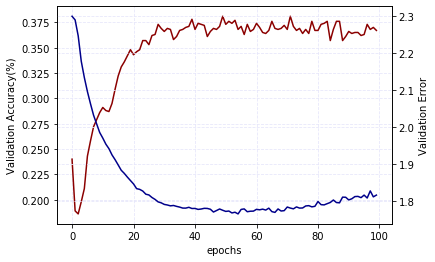

In [11]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

---

# PyTorch

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

####################
### Model 
###################
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # an affine operation : y = Wx + b
        self.fc1 = nn.Linear(input_size, hidden_size) # input, output
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=3072, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [13]:
import torch.optim as optim
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

In [18]:
history = {'val_acc': [],'val_loss': [], 'train_acc':[], 'train_loss':[]} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
def exe(epoch_size):
    
    net.train()
    
    for i in range(epoch_size):
        correct = 0
        total = 0
        running_loss = 0
        for j in range(N//batch_size):
            batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
            x_batch = torch.FloatTensor(train_data[batch_mask])
            t_batch = torch.LongTensor(train_labels[batch_mask])

            # Gradient buffer를 0으로 초기화
            optimizer.zero_grad()

            # Forward
            outputs = net(x_batch)
            # Backward
            loss = criterion(outputs, t_batch)
            loss.backward()
            # Update the weights
            optimizer.step()

            # Statistics
            _, predicted = torch.max(outputs.data, 1)
            total += t_batch.size(0)
            correct += (predicted == t_batch).sum().item()
            running_loss += loss.item()

        acc = 100*correct/total    
        history['train_loss'].append(running_loss / 50)
        history['train_acc'].append(acc)

        

        print('[%d] loss: %.3f acc: %.3f ' %
              (i + 1, running_loss / 10, acc))
        print('Accuracy of the network on the 50000 train images: %d %%' %  acc)
        running_loss = 0.0

        # Test
        net.eval()
        correct = 0
        total = 0
        val_loss = 0

        with torch.no_grad():
            for k in range(M//batch_size):
                batch_mask = np.random.choice(M, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
                x_batch = torch.FloatTensor(test_data[batch_mask])
                t_batch = torch.LongTensor(test_labels[batch_mask])

                 # Forward
                outputs = net(x_batch)

                # loss
                loss = criterion(outputs, t_batch)

                # Statistics
                _, predicted = torch.max(outputs.data, 1)
                total += t_batch.size(0)
                correct += (predicted == t_batch).sum().item()
                val_loss += loss.item()

            #accuracy와 loss를 기록해둡시다.
            acc = 100*correct/total
            history["val_acc"].append(acc)
            history["val_loss"].append(val_loss / 10)

            
            print('[%d] loss: %.3f acc: %.3f ' %
                  (i + 1, val_loss / 10, acc))
            print('Accuracy of the network on the 10000 test images: %d %%' % acc)
            val_loss = 0.0

In [15]:
exe(epoch_size) # epoch 사이즈를 

[10] loss: 12.942 acc: 47.280 
Accuracy of the network on the 50000 train images: 47 %
[10] loss: 4.893 acc: 30.300 
Accuracy of the network on the 10000 test images: 30 %
[20] loss: 7.900 acc: 58.960 
Accuracy of the network on the 50000 train images: 58 %
[20] loss: 4.606 acc: 30.300 
Accuracy of the network on the 10000 test images: 30 %
[30] loss: 5.116 acc: 69.060 
Accuracy of the network on the 50000 train images: 69 %
[30] loss: 4.847 acc: 31.600 
Accuracy of the network on the 10000 test images: 31 %
[40] loss: 3.358 acc: 79.660 
Accuracy of the network on the 50000 train images: 79 %
[40] loss: 4.719 acc: 28.900 
Accuracy of the network on the 10000 test images: 28 %
[50] loss: 2.530 acc: 85.640 
Accuracy of the network on the 50000 train images: 85 %
[50] loss: 4.507 acc: 30.300 
Accuracy of the network on the 10000 test images: 30 %
[60] loss: 2.044 acc: 88.900 
Accuracy of the network on the 50000 train images: 88 %
[60] loss: 4.653 acc: 29.900 
Accuracy of the network on t

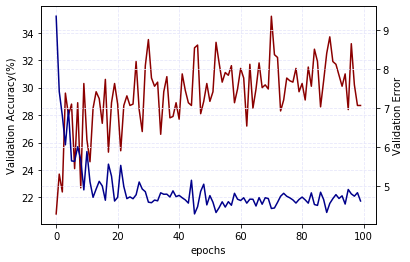

In [16]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()
# epoch사이즈가 100까지 필요없다. 시간이 지날수록 오버피팅되어서 그래프상으로 보면 10정도가 적당해보인다.

# 모델 변경시켜서 학습시켜 보기
## 1. Opimization 변경 - 큰 변화가 없음을 볼 수 있다.

In [17]:
epoch_size = 15 # epoch사이즈 변경

In [19]:
criterion = nn.CrossEntropyLoss()
# adam : 
# momentum(기울기의 가속도가 있다고 판단) +
# adagrad(지금까지 많이 변화하지 않은 변수들은 step size를 크게 하고, 지금까지 많이 변화했던 변수들은 step size를 작게 하자’) +
# rmsprop(Gt 부분을 합이 아니라 지수평균으로 바꾸어서 대체한 방법 ada grad)

# nag : momentum step을 먼저 이동했다고 생각한 후 그 자리에서의 gradient를 구해서 gradient step을 이동한다
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(net.parameters(), lr=learning_rate)
exe(epoch_size)

[1] loss: 72.913 acc: 26.380 
Accuracy of the network on the 50000 train images: 26 %
[1] loss: 9.433 acc: 28.000 
Accuracy of the network on the 10000 test images: 28 %
[2] loss: 34.279 acc: 35.920 
Accuracy of the network on the 50000 train images: 35 %
[2] loss: 7.918 acc: 27.800 
Accuracy of the network on the 10000 test images: 27 %
[3] loss: 26.884 acc: 40.360 
Accuracy of the network on the 50000 train images: 40 %
[3] loss: 7.337 acc: 30.100 
Accuracy of the network on the 10000 test images: 30 %
[4] loss: 23.090 acc: 41.800 
Accuracy of the network on the 50000 train images: 41 %
[4] loss: 7.733 acc: 28.800 
Accuracy of the network on the 10000 test images: 28 %
[5] loss: 20.266 acc: 45.480 
Accuracy of the network on the 50000 train images: 45 %
[5] loss: 6.456 acc: 28.900 
Accuracy of the network on the 10000 test images: 28 %
[6] loss: 19.278 acc: 46.740 
Accuracy of the network on the 50000 train images: 46 %
[6] loss: 7.072 acc: 26.300 
Accuracy of the network on the 1000

In [20]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(net.parameters(), lr=learning_rate)
exe(epoch_size)

[1] loss: 51.024 acc: 20.420 
Accuracy of the network on the 50000 train images: 20 %
[1] loss: 9.082 acc: 19.000 
Accuracy of the network on the 10000 test images: 19 %
[2] loss: 39.740 acc: 24.000 
Accuracy of the network on the 50000 train images: 24 %
[2] loss: 8.701 acc: 21.300 
Accuracy of the network on the 10000 test images: 21 %
[3] loss: 34.746 acc: 26.640 
Accuracy of the network on the 50000 train images: 26 %
[3] loss: 7.832 acc: 21.000 
Accuracy of the network on the 10000 test images: 21 %
[4] loss: 32.110 acc: 27.480 
Accuracy of the network on the 50000 train images: 27 %
[4] loss: 7.365 acc: 23.300 
Accuracy of the network on the 10000 test images: 23 %
[5] loss: 31.684 acc: 28.240 
Accuracy of the network on the 50000 train images: 28 %
[5] loss: 7.458 acc: 21.700 
Accuracy of the network on the 10000 test images: 21 %
[6] loss: 28.573 acc: 30.400 
Accuracy of the network on the 50000 train images: 30 %
[6] loss: 7.463 acc: 22.700 
Accuracy of the network on the 1000

In [21]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
exe(epoch_size)

[1] loss: 52.986 acc: 22.540 
Accuracy of the network on the 50000 train images: 22 %
[1] loss: 8.091 acc: 26.100 
Accuracy of the network on the 10000 test images: 26 %
[2] loss: 31.133 acc: 32.900 
Accuracy of the network on the 50000 train images: 32 %
[2] loss: 7.158 acc: 23.300 
Accuracy of the network on the 10000 test images: 23 %
[3] loss: 25.009 acc: 34.840 
Accuracy of the network on the 50000 train images: 34 %
[3] loss: 6.677 acc: 29.500 
Accuracy of the network on the 10000 test images: 29 %
[4] loss: 20.543 acc: 40.060 
Accuracy of the network on the 50000 train images: 40 %
[4] loss: 6.077 acc: 28.200 
Accuracy of the network on the 10000 test images: 28 %
[5] loss: 17.286 acc: 44.680 
Accuracy of the network on the 50000 train images: 44 %
[5] loss: 6.097 acc: 30.900 
Accuracy of the network on the 10000 test images: 30 %
[6] loss: 14.799 acc: 48.220 
Accuracy of the network on the 50000 train images: 48 %
[6] loss: 5.705 acc: 29.800 
Accuracy of the network on the 1000

# normalization후 층(layer) 개수 늘리고 dropout 적용

In [22]:
input_size, output_size, train_data.shape, hidden_size

(3072, 10, (5000, 3072), 50)

In [23]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # an affine operation : y = Wx + b
        self.fc1 = nn.Linear(input_size, 1536) # input, output
        self.fc1_bn = torch.nn.BatchNorm1d(1536)
        self.fc2 = nn.Linear(1536, 512) # input, output
        self.fc3 = nn.Linear(512, 256)
        self.fc3_bn = torch.nn.BatchNorm1d(256)
        self.fc4 = nn.Linear(256, output_size)
    
    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        x = self.fc1_bn(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc3_bn(x)
        x = F.dropout(x, training=self.training)
        x = self.fc4(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [24]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
exe(epoch_size)

'''
시간은 확실히 오래걸리지만 normalization과 dropout을 적용하니 test 정확도가 더 높게 나옴을 볼 수 있다!
30대 -> 40대
'''

[1] loss: 9.282 acc: 35.380 
Accuracy of the network on the 50000 train images: 35 %
[1] loss: 1.781 acc: 39.300 
Accuracy of the network on the 10000 test images: 39 %
[2] loss: 7.740 acc: 47.020 
Accuracy of the network on the 50000 train images: 47 %
[2] loss: 1.715 acc: 37.600 
Accuracy of the network on the 10000 test images: 37 %
[3] loss: 6.995 acc: 51.620 
Accuracy of the network on the 50000 train images: 51 %
[3] loss: 1.659 acc: 43.000 
Accuracy of the network on the 10000 test images: 43 %
[4] loss: 6.250 acc: 57.720 
Accuracy of the network on the 50000 train images: 57 %
[4] loss: 1.719 acc: 41.200 
Accuracy of the network on the 10000 test images: 41 %
[5] loss: 5.588 acc: 63.240 
Accuracy of the network on the 50000 train images: 63 %
[5] loss: 1.715 acc: 40.200 
Accuracy of the network on the 10000 test images: 40 %
[6] loss: 4.924 acc: 67.680 
Accuracy of the network on the 50000 train images: 67 %
[6] loss: 1.857 acc: 40.300 
Accuracy of the network on the 10000 test

'\n시간은 확실히 오래걸리지만 normalization과 dropout을 적용하니 정확도가 더 높게 나옴을 볼 수 있다!\n30대 -> 40대\n'